# CNN model

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report, plot_confusion_matrix
%matplotlib inline

In [2]:
tf.compat.v1.set_random_seed(2022)

In [4]:
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)
    # accuracy subplot
    axs[0].plot(hist.history["acc"], label="train accuracy")
    axs[0].plot(hist.history["val_acc"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    
    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")

In [3]:
bs=40         #Setting batch size
train_dir = "/mnt/c/Users/rodri/OneDrive/Documentos/Rodrigo/Chicago/Clases/GITHUB_RodSlzr/Machine_Learning/MusiCAPPture/data/images_train_test/train_images/"   #Setting training directory
validation_dir = "/mnt/c/Users/rodri/OneDrive/Documentos/Rodrigo/Chicago/Clases/GITHUB_RodSlzr/Machine_Learning/MusiCAPPture/data/images_train_test/test_images/"   #Setting testing directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
# Flow training images in batches of 20 using train_datagen generator
#Flow_from_directory function lets the classifier directly identify the labels from the name of the directories the image lies in
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  batch_size=bs,
                                                  class_mode='categorical',
                                                  target_size=(180,180),
                                                 shuffle=True)
# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180),
                                                        shuffle=True)

Found 799 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [5]:
# super model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(1,1),activation = "relu" , input_shape = (180,180,3)) , #Convolution
    tf.keras.layers.Conv2D(32, (2, 2), activation = "relu"),  #Convolution
    tf.keras.layers.MaxPooling2D(2, 2), #Pooling
    tf.keras.layers.Conv2D(32, (2, 2), activation = "relu"),  #Convolution
    tf.keras.layers.MaxPooling2D(3, 3), #Pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),  #Convolution
    tf.keras.layers.MaxPooling2D(3, 3), #Pooling
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(800,activation="relu"),      #Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(600,activation="relu"),      #Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(10,activation = "softmax")   #Output Layer
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=150 // bs,
                    epochs=75,
                    validation_steps=50 // bs,
                    verbose=2)



Epoch 1/75
3/3 - 5s - loss: 2.3899 - acc: 0.0917 - val_loss: 2.2807 - val_acc: 0.1000
Epoch 2/75
3/3 - 4s - loss: 2.3176 - acc: 0.1250 - val_loss: 2.3013 - val_acc: 0.1500
Epoch 3/75
3/3 - 4s - loss: 2.2957 - acc: 0.1583 - val_loss: 2.2827 - val_acc: 0.1500
Epoch 4/75
3/3 - 4s - loss: 2.2759 - acc: 0.1333 - val_loss: 2.2650 - val_acc: 0.1500
Epoch 5/75
3/3 - 4s - loss: 2.2728 - acc: 0.1417 - val_loss: 2.3132 - val_acc: 0.1250
Epoch 6/75
3/3 - 5s - loss: 2.2320 - acc: 0.1417 - val_loss: 2.2297 - val_acc: 0.2500
Epoch 7/75
3/3 - 5s - loss: 2.2392 - acc: 0.1750 - val_loss: 2.1567 - val_acc: 0.2250
Epoch 8/75
3/3 - 5s - loss: 2.1550 - acc: 0.1667 - val_loss: 2.1000 - val_acc: 0.1750
Epoch 9/75
3/3 - 4s - loss: 2.0800 - acc: 0.2941 - val_loss: 2.2342 - val_acc: 0.1250
Epoch 10/75
3/3 - 4s - loss: 2.0532 - acc: 0.2750 - val_loss: 2.0474 - val_acc: 0.2250
Epoch 11/75
3/3 - 4s - loss: 2.1053 - acc: 0.1917 - val_loss: 2.2325 - val_acc: 0.1500
Epoch 12/75
3/3 - 4s - loss: 2.0701 - acc: 0.2167 - 

<Figure size 1440x1080 with 0 Axes>

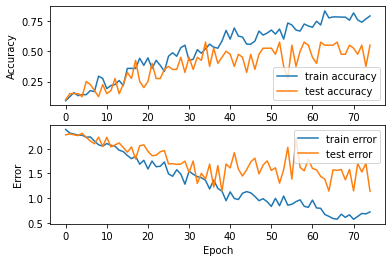

In [6]:
plot_history(history)

In [7]:
print("Evaluate on test data")
results = model.evaluate(validation_generator, batch_size=30)

Evaluate on test data
5/5 [==============================] - 2s 292ms/step - loss: 1.5637 - acc: 0.4800


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 179, 179, 32)      2080      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 88, 88, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0

In [9]:
# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180),
                                                        shuffle=False)

Found 200 images belonging to 10 classes.


In [10]:
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
#target_names = ['Cats', 'Dogs', 'Horse']
print(classification_report(validation_generator.classes, y_pred))

/mnt/c/Users/rodri/OneDrive/Documentos/Rodrigo/Chicago/Clases/GITHUB_RodSlzr/Machine_Learning/MusiCAPPture/venv/lib/python3.6/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[11  0  3  0  2  2  0  0  1  1]
 [ 0 18  1  0  0  1  0  0  0  0]
 [ 0  0  9  4  1  1  0  1  2  2]
 [ 3  0  2  5  7  0  0  0  1  2]
 [ 0  0  0  0 19  0  0  0  1  0]
 [ 6  1  1  1  1  7  0  1  2  0]
 [ 1  0  0  2  6  0 10  0  0  1]
 [ 0  0  1  5  5  0  0  9  0  0]
 [ 2  0  1  4  7  1  0  1  4  0]
 [ 3  0  1  5  3  0  4  0  0  4]]
Classification Report
              precision    recall  f1-score   support

           0       0.42      0.55      0.48        20
           1       0.95      0.90      0.92        20
           2       0.47      0.45      0.46        20
           3       0.19      0.25      0.22        20
           4       0.37      0.95      0.54        20
           5       0.58      0.35      0.44        20
           6       0.71      0.50      0.59        20
           7       0.75      0.45      0.56        20
           8       0.36      0.20      0.26        20
           9       0.40      0.20      0.27        20

    accuracy                      

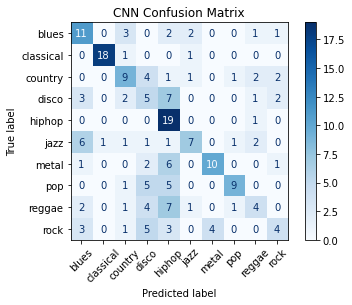

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
        'metal', 'pop', 'reggae', 'rock']

cm = confusion_matrix(validation_generator.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.title("CNN Confusion Matrix")
plt.show()

In [14]:
bs=40         #Setting batch size

happy_dir = "/mnt/c/Users/rodri/OneDrive/Documentos/Rodrigo/Chicago/Clases/GITHUB_RodSlzr/Machine_Learning/MusiCAPPture/data/images_train_test/happy/"   #Setting testing directory
#from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# All images will be rescaled by 1./255.
happy_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow validation images in batches of 20 using test_datagen generator
happy_generator =  happy_datagen.flow_from_directory(happy_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180),
                                                        shuffle=False)

Found 3 images belonging to 10 classes.


In [15]:
Y_pred = model.predict_generator(happy_generator) #, 50 // bs+1)
y_pred = np.argmax(Y_pred, axis=1)
y_pred

array([1, 6, 6])

In [16]:
pwd

'/mnt/c/Users/rodri/OneDrive/Documentos/Rodrigo/Chicago/Clases/GITHUB_RodSlzr/Machine_Learning/MusiCAPPture'